In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read(filename):
    if filename.endswith('.tsv'):
        sep = '\t'
    else:
        sep = ','
    data = pd.read_csv(filename, sep=sep)
    data['Time'] = data.TimeNanoseconds.map(lambda ns: np.timedelta64(ns, 'ns'))
    return data[['Iteration', 'Time', 'Fatigue']].set_index('Iteration')

data = read('./out/log-04.tsv')

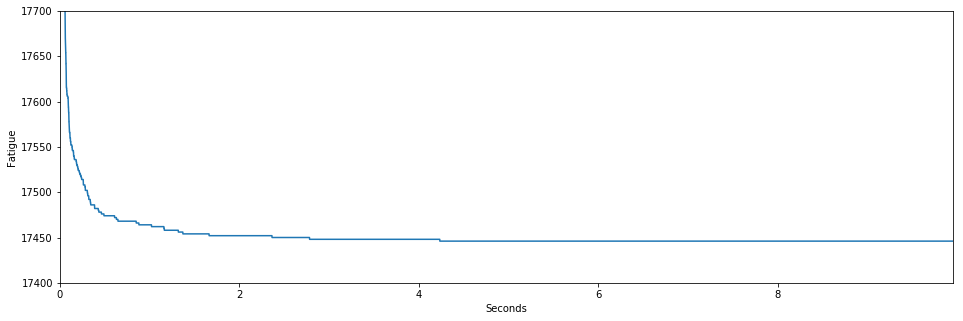

In [3]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(data.Time.dt.total_seconds(), data.Fatigue)
ax.set_ylim(17400, 17700)
ax.margins(0)
ax.set_xlabel('Seconds')
ax.set_ylabel('Fatigue')
plt.show()